In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

dataf = pd.read_csv('ifood_df.csv')
pd.set_option('display.max_columns', None)
dataf.head()



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [4]:
#check for duplicates
dataf_dup = dataf[dataf.duplicated()]
print("you have {} duplicated data".format(dataf_dup.shape[0]))

you have 184 duplicated data


In [5]:
#remove duplicates
dataf.drop_duplicates(keep=False, inplace=True)

In [6]:
#Lets create a column that tells us the number of children in the house

dataf["N_children"] = dataf[["Kidhome", "Teenhome"]].sum(axis = 1)
dataf = dataf.drop(["Kidhome", "Teenhome"], axis = 1)

In [7]:
#Lets sum the levels of education into a column, the higher the number the higher the lvl

dataf["education_2n Cycle"]=dataf["education_2n Cycle"].replace({1:1,0:0})
dataf['education_Basic']=dataf['education_Basic'].replace({1:2,0:0})
dataf['education_Graduation']=dataf['education_Graduation'].replace({1:3,0:0})
dataf["education_Master"]=dataf['education_Master'].replace({1:4,0:0})
dataf["education_PhD"]=dataf['education_PhD'].replace({1:5,0:0})

dataf["Level of education"] = dataf[["education_2n Cycle",'education_Basic','education_Graduation','education_Master', 'education_PhD']].sum(axis=1)
#Drop education columns
dataf = dataf.drop(["education_2n Cycle",'education_Basic','education_Graduation','education_Master', 'education_PhD'], axis = 1)

In [8]:
#Marital status is given in 5 columns, lets create one column to help visualization and simplify data structure

#First replace the positive data with another number.
dataf['marital_Married']=dataf['marital_Married'].replace({1:5,0:0})
dataf['marital_Single']=dataf['marital_Single'].replace({1:4,0:0})
dataf['marital_Together']=dataf['marital_Together'].replace({1:3,0:0})
dataf['marital_Widow']=dataf['marital_Widow'].replace({1:2,0:0})
dataf['marital_Divorced']=dataf['marital_Divorced'].replace({1:1,0:0})

#Combine it into a column
dataf["marital_status_str"] = dataf[['marital_Married','marital_Single','marital_Together','marital_Widow','marital_Divorced']].sum(axis=1)

#Map the numbers to a marital status

dataf['marital_status_str']=dataf['marital_status_str'].map({1:'Divorced', 2:'Widow',3:'Together',4:'Single',5:'Married'})

In [9]:
#Letscreate a new column, if the client has accepted the campaing it will show a 1 if the client has not it will show a 0 
dataf['AcceptedCmp'] = dataf[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
dataf['AcceptedCmp'] = (dataf['AcceptedCmp'] > 0).astype(int)

#Lets drop the unnecesary columns 

dataf = dataf.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',"AcceptedCmpOverall"], axis=1)

In [10]:
#Lets clean the data some more by dropping some unimportant columns

dataf = dataf.drop(["Z_CostContact","Z_Revenue"], axis = 1)

In [11]:
# Create a DataFrame with dummy variables for categorical columns
encoded_dataf = pd.get_dummies(dataf)

# Calculate correlations for the encoded columns with respect to 'AcceptedCmp'
correlations = encoded_dataf.corr()['AcceptedCmp'].sort_values(ascending=False)

correlations

AcceptedCmp                    1.000000
MntWines                       0.461281
MntTotal                       0.408568
MntRegularProds                0.408493
Response                       0.360220
Income                         0.328398
NumCatalogPurchases            0.320972
MntMeatProducts                0.273522
NumWebPurchases                0.217850
NumStorePurchases              0.194347
MntGoldProds                   0.173950
MntSweetProducts               0.146843
MntFishProducts                0.142262
MntFruits                      0.136188
Level of education             0.039102
marital_Widow                  0.016490
marital_status_str_Widow       0.016490
marital_Single                 0.010632
marital_status_str_Single      0.010632
Age                            0.005825
marital_Married                0.001860
marital_status_str_Married     0.001860
marital_Together              -0.005107
marital_status_str_Together   -0.005107
Customer_Days                 -0.009468


Number of accepted = 1448
Number of rejected =  395


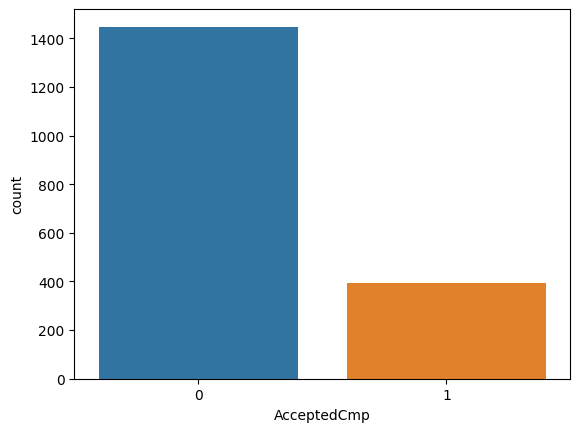

In [12]:
#Lets see the number of people that accepted the campaign
sns.countplot(x=dataf["AcceptedCmp"])
A, Na = dataf["AcceptedCmp"].value_counts()
print("Number of accepted =",A)
print("Number of rejected = ", Na)

#We can see that the majority of people rejected the campaings

In [13]:
dataf['Ratio of wines'] = (dataf[['MntWines']].sum(axis=1)) / dataf['MntTotal']
dataf['Ratio of food'] = (dataf[['MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts']].sum(axis=1)) / dataf['MntTotal']
dataf['Ratio of gold'] = (dataf[['MntGoldProds']].sum(axis=1)) / dataf['MntTotal']
dataf['Ratio of regular products'] = (dataf[['MntRegularProds']].sum(axis=1)) / dataf['MntTotal']

In [14]:
dataf["MntFood"] = (dataf[['MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts']].sum(axis=1))


In [15]:
dataf['Total_purchases'] = dataf[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases',"NumDealsPurchases"]].sum(axis = 1)


In [16]:
dataf['online_purchase_ratio'] = dataf['NumWebPurchases'] / (dataf['NumWebPurchases'] + dataf['NumCatalogPurchases'] + dataf['NumStorePurchases'])


In [17]:
# define the age groups
age_groups = [(23, 30), (31, 38), (39, 46), (47, 54), (55, 62), (63, 70), (71, 78), (79, 81)]


# create a function to assign age group based on age
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]}-{age_range[1]}"
    return "Unknown"

# apply the function to create a new column for age group
dataf['age_group'] = dataf['Age'].apply(assign_age_group)

#keep the data ordered for better visualization
age_order = ['23-30', '31-38', '39-46', '47-54', '55-62', '63-70', '71-78', '79-81']

In [18]:
#Reverse categorical transformation of one-hot encoded marital status

reverse_encoding = {5: 1, 4: 1, 3: 1, 2: 1, 1: 1, 0: 0}
dataf['marital_Married'] = dataf['marital_Married'].map(reverse_encoding)
dataf['marital_Single'] = dataf['marital_Single'].map(reverse_encoding)
dataf['marital_Together'] = dataf['marital_Together'].map(reverse_encoding)
dataf['marital_Widow'] = dataf['marital_Widow'].map(reverse_encoding)
dataf['marital_Divorced'] = dataf['marital_Divorced'].map(reverse_encoding)

In [19]:
#drop the features that we are not going to use 

dataf = dataf.drop(["marital_status_str","MntFood", "age_group", "online_purchase_ratio"], axis = 1)

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [21]:
# Separate the labels from the features
X = dataf.drop('AcceptedCmp', axis=1)
y = dataf["AcceptedCmp"]

In [37]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [38]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [39]:
# Define the logistic regression model with class weighting
log_reg = LogisticRegression(random_state=42, class_weight='balanced')


In [40]:
# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000]
}

In [41]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [42]:
# Perform hyperparameter tuning using GridSearchCV with stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000, 5000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [43]:
# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Best Parameters:
{'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [44]:
# Use the best model from GridSearchCV for prediction and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [45]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[291  71]
 [ 19  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       362
           1       0.53      0.81      0.64        99

    accuracy                           0.80       461
   macro avg       0.73      0.81      0.75       461
weighted avg       0.85      0.80      0.82       461


Accuracy Score:
0.8047722342733189
